In [1]:
import tensorflow as tf
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
def extract_images_from_folder(root_folder, target_size=(256, 256)):
    image_data = []
    labels = []
    label_to_index = {}  # Dictionary to map label names to numerical indices
    index = 0

    for subdir, dirs, files in os.walk(root_folder):
        for file in tqdm(files):
            filepath = os.path.join(subdir, file)
            img = cv2.imread(filepath)
            img = cv2.resize(img, target_size)

            label = os.path.basename(subdir)
            if label not in label_to_index:
                label_to_index[label] = index
                index += 1

            image_data.append(img)
            labels.append(label_to_index[label])

    image_data = np.array(image_data)
    labels = np.array(labels)

    return image_data, labels, label_to_index

In [11]:
root_folder = "archive (1)\Train\Train"
x_train,y_train,label_reverse_train = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|██████████| 434/434 [02:14<00:00,  3.22it/s]


In [12]:
root_folder = "archive (1)\Validation\Validation"
x_val,y_val,label_reverse_val = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|██████████| 20/20 [00:06<00:00,  3.23it/s]


In [13]:
root_folder = "archive (1)\Test\Test"
x_test,y_test,label_reverse_test = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|██████████| 50/50 [00:14<00:00,  3.51it/s]


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_reverse_train), activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.3908 - loss: 1.5287 - val_accuracy: 0.6500 - val_loss: 0.8047
Epoch 2/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.6723 - loss: 0.7076 - val_accuracy: 0.7667 - val_loss: 0.5492


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - accuracy: 0.7827 - loss: 0.6060
Test accuracy: 0.7400000095367432


In [ ]:
#https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset

In [20]:
predictions = model.predict(x_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


In [21]:
labels=["Healthy","Powdery","Rust"]
import numpy as np
label = labels[np.argmax(predictions)]

Healthy


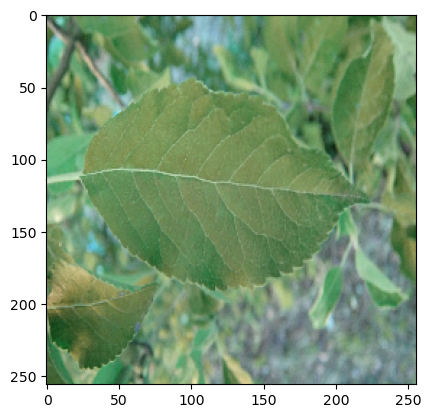

In [24]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(x_test[:10][9])
plt.show()